In [1]:
import keras
import tensorflow as tf
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop

C:\Users\diego\Miniconda3\envs\agoravai\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


Em um problema real de Redes Neurais, normalmente uma instância pode possuir inúmeras entradas, resultando em uma arquitetura de rede extensa com muitos neurônios e de múltiplas camadas. 

Um exemplo comum de aplicação nesse escopo é um classificador de imagens, em que cada entrada representa um neurônio da camada de entrada. Sabendo disso, esse notebook tem como objetivo implementar uma Rede Neural Multicamada (MLP) para o dataset MNIST. O MNIST é um dataset de dígitos escritos a mão, conforme Figura 1. 

A MLP deve ser implementada de forma a utilizar uma arquitetura simples e ainda, assim, obter uma performance elevada. Ao final, três modelos de rede devem ser implementados e comparados. Os detalhes de implementação devem ser justificados a cada questão e será dividido em 5 etapas:
* Leitura, visualização e Préprocessamento do dataset
* Conversão do array de predições Y
* Definição da topologia da rede (camadas e neurônios)
* Definir otimizador, função custo e modo do treinamento (batch, mini-batch, estocástico)
* Treinamento e avaliação de resultados

![alt text](imgs/mninst.png "Title")

# Leitura, visualização e pré-processamento do dataset

Ao utilizar Redes Neurais para imagens, cada entrada é um pixel. Dessa forma, após a leitura do dataset, precisa-se descobrir as dimensões da imagem, a quantidade de instâncias, quantas classes e entradas são necessárias para o problema.

Feito isso, algumas técnicas de pré-processamento devem ser utilizadas para melhores resultados, dentre eles converter a imagem para tons de cinza e normalizar.

Sabendo disso, retorne na célula abaixo essas informações e gere uma versão normalizada do dataset 


 Exemplos de treinamento: (60000, 28, 28)
 Labels de treinamento: (60000,)
 Exemplos de teste: (10000, 28, 28)
 Labels de teste: (10000,)

60000 Amostras de treinameto
10000 Amostras de teste


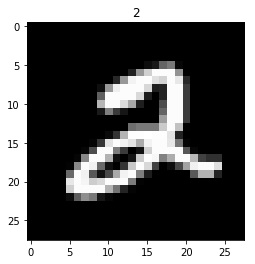

In [29]:
### leitura do dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
### Visualizar instâncias
plt.imshow(x_train[5], cmap=plt.get_cmap('gray'))
plt.title(y_train[5])
### Print - informações das instâncias
print(" Exemplos de treinamento: " + str(x_train.shape) + "\n", 
      "Labels de treinamento: " + str(y_train.shape) + "\n", 
      "Exemplos de teste: " + str(x_test.shape) + "\n", 
      "Labels de teste: " + str(y_test.shape) + "\n")
### Normalizar
x_train = x_train.reshape(60000,784).astype('float32') / 255
x_test =  x_test.reshape(10000,784).astype('float32') / 255
print(x_train.shape[0], 'Amostras de treinameto')
print(x_test.shape[0], 'Amostras de teste')

# Conversão do array de predições Y

Baseado no número de classes do problema, represente a saída como one-hot encoding. Indique a importância dessa representação.

In [27]:
num_classes = 10

def one_hot(true_labels,num_classes):
    """
    Função que implementa o one-hot encoding
    Entrada: true_labels - array original com os labels
    Retorna: labels - conversão one-hot          
    """
    labels = keras.utils.to_categorical(true_labels, num_classes)
    return labels

y_train_oh = one_hot(y_train, num_classes)
y_test_oh = one_hot(y_test, num_classes)
print(y_train_oh.shape)
print(y_test_oh.shape)
print(y_test_oh[1])
#print(x_train[5])
#print(y_train_oh[5])

(60000, 10)
(10000, 10)
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


# Definição de Topologia da Rede

Mostre as três arquiteturas que serão utilizadas para resolver o problema. As arquiteturas devem ser simples de forma a retornar bons resultados com a menor quantidade necessária de neurônios e camadas. As três arquiteturas devem variar apenas quanto ao número de neurônios e camadas (incluindo regularização). Baseado nisso, explique:
* Quantos neurônios serão utilizados em cada camada?
* Quantas camadas serão utilizadas?
* É necessário utilizar regularização? Se sim explique a técnica que foi utilizada e o impacto nos resultados
* Qual função de ativação será utilizada? Escolha duas funções de ativação e explique os resultados obtidos

## Arquitetura 1

In [45]:
model = Sequential()
model.add(Dense(units=32, activation='relu', input_shape=(784,)))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=num_classes, activation='sigmoid'))
model.compile(optimizer="adam", loss='categorical_crossentropy',  metrics=['accuracy'])

model.summary()

history = model.fit(x=x_train, y=y_train_oh, batch_size=256, epochs=30, verbose=1, validation_data=(x_test, y_test_oh))

score = model.evaluate(x_test, y_test_oh, verbose=0)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_59 (Dense)             (None, 32)                25120     
_________________________________________________________________
dense_60 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_61 (Dense)             (None, 10)                330       
Total params: 26,506
Trainable params: 26,506
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 3s 47us/step - loss: 0.7242 - acc: 0.8016 - val_loss: 0.3010 - val_acc: 0.9165
Epoch 2/30
60000/60000 [==============================] - 2s 38us/step - loss: 0.2736 - acc: 0.9228 - val_loss: 0.2338 - val_acc: 0.9337
Epoch 3/30
60000/60000 [==============================] - 2s 36us/step - loss:

## Arquitetura 2

In [48]:
model = Sequential()
model.add(Dense(units=32, activation='relu', input_shape=(784,)))
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=num_classes, activation='sigmoid'))
model.compile(optimizer="adam", loss='categorical_crossentropy',  metrics=['accuracy'])

model.summary()

history = model.fit(x=x_train, y=y_train_oh, batch_size=256, epochs=30, verbose=1, validation_data=(x_test, y_test_oh))

score = model.evaluate(x_test, y_test_oh, verbose=0)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_70 (Dense)             (None, 32)                25120     
_________________________________________________________________
dense_71 (Dense)             (None, 64)                2112      
_________________________________________________________________
dense_72 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_73 (Dense)             (None, 10)                330       
Total params: 29,642
Trainable params: 29,642
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 3s 52us/step - loss: 0.7060 - acc: 0.7991 - val_loss: 0.2732 - val_acc: 0.9248
Epoch 2/30
60000/60000 [==============================] - 2s 39us/step - loss: 0.24

## Arquitetura 3

In [51]:
model = Sequential()
model.add(Dense(units=64, activation='relu', input_shape=(784,)))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=16, activation='relu'))
model.add(Dense(units=num_classes, activation='sigmoid'))
model.compile(optimizer="adam", loss='categorical_crossentropy',  metrics=['accuracy'])

model.summary()

history = model.fit(x=x_train, y=y_train_oh, batch_size=256, epochs=30, verbose=1, validation_data=(x_test, y_test_oh))

score = model.evaluate(x_test, y_test_oh, verbose=0)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_82 (Dense)             (None, 64)                50240     
_________________________________________________________________
dense_83 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_84 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_85 (Dense)             (None, 10)                170       
Total params: 53,018
Trainable params: 53,018
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 4s 62us/step - loss: 0.7532 - acc: 0.7760 - val_loss: 0.2943 - val_acc: 0.9169
Epoch 2/30
60000/60000 [==============================] - 2s 38us/step - loss: 0.25

# Definir otimizador, função custo e modo do treinamento

Uma Rede Neural é um problema de otimização, sabendo disso, explique:
* Qual otimizador será utilizado? Escolha dois otimizadores, explique a diferença entre eles justificando a escolha e comente os resultados obtidos.
* Será necessário utilizar uma função custo? Explique o que é uma função custo e qual será utilizada justificando a escolha.
* Qual modo de treinamento foi utilizado? Justifique sua resposta
* Quantas épocas serão necessárias? Caso os métodos por batch ou mini-batch sejam escolhidos, indique também o tamanho



# Treinamento e avaliação dos resultados

Treine as três redes e mostre os resultados de cada uma a partir das questões anteriores.
